In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [10]:
# Load the dataset
airbnb = pd.read_csv('/content/drive/My Drive/Data/AB_NYC_2019.csv')

# Explore the structure and statistics of the dataset
(airbnb.head())
(airbnb.describe())

id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min          1.000000           0.000000           0.010000   
25%          1.000000           1.000000           0.190000   
50%          3.000000           5.000000           0.720000   
75%          5.000000          24.000000           2.020000   
max       1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365  
count                    48895.000000      48895.000000  
mean                         7.143982        112.781327  
std                         32.952519        131.622289  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         45.000000  
75%                          2.000000        227.000000  
max                        327.000000        365.000000

In [11]:
airbnb.shape

(48895, 16)

In [12]:
airbnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [13]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [14]:
airbnb.duplicated().sum()
airbnb.drop_duplicates(inplace=True)

In [15]:
airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [16]:
airbnb.drop(['name','id','host_name','last_review'], axis=1, inplace=True)

In [17]:
airbnb.head(5)

host_id neighbourhood_group neighbourhood  latitude  longitude  \
0     2787            Brooklyn    Kensington  40.64749  -73.97237   
1     2845           Manhattan       Midtown  40.75362  -73.98377   
2     4632           Manhattan        Harlem  40.80902  -73.94190   
3     4869            Brooklyn  Clinton Hill  40.68514  -73.95976   
4     7192           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews  \
0     Private room    149               1                  9   
1  Entire home/apt    225               1                 45   
2     Private room    150               3                  0   
3  Entire home/apt     89               1                270   
4  Entire home/apt     80              10                  9   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [18]:
airbnb.fillna({'reviews_per_month':0}, inplace=True)
#examing changes
airbnb.reviews_per_month.isnull().sum()

0

In [19]:
airbnb.isnull().sum()
airbnb.dropna(how='any',inplace=True)
airbnb.info() #.info() function is used to get a concise summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48895 non-null  int64  
 1   neighbourhood_group             48895 non-null  object 
 2   neighbourhood                   48895 non-null  object 
 3   latitude                        48895 non-null  float64
 4   longitude                       48895 non-null  float64
 5   room_type                       48895 non-null  object 
 6   price                           48895 non-null  int64  
 7   minimum_nights                  48895 non-null  int64  
 8   number_of_reviews               48895 non-null  int64  
 9   reviews_per_month               48895 non-null  float64
 10  calculated_host_listings_count  48895 non-null  int64  
 11  availability_365                48895 non-null  int64  
dtypes: float64(3), int64(6), object(

In [20]:
airbnb.describe()

host_id      latitude     longitude         price  minimum_nights  \
count  4.889500e+04  48895.000000  48895.000000  48895.000000    48895.000000   
mean   6.762001e+07     40.728949    -73.952170    152.720687        7.029962   
std    7.861097e+07      0.054530      0.046157    240.154170       20.510550   
min    2.438000e+03     40.499790    -74.244420      0.000000        1.000000   
25%    7.822033e+06     40.690100    -73.983070     69.000000        1.000000   
50%    3.079382e+07     40.723070    -73.955680    106.000000        3.000000   
75%    1.074344e+08     40.763115    -73.936275    175.000000        5.000000   
max    2.743213e+08     40.913060    -73.712990  10000.000000     1250.000000   

       number_of_reviews  reviews_per_month  calculated_host_listings_count  \
count       48895.000000       48895.000000                    48895.000000   
mean           23.274466           1.090910                        7.143982   
std            44.550582           1.597283                       32.952519   
min             0.000000           0.000000                        1.000000   
25%             1.000000           0.040000                        1.000000   
50%             5.000000           0.370000                        1.000000   
75%            24.000000           1.580000                        2.000000   
max           629.000000          58.500000                      327.000000   

       availability_365  
count      48895.000000  
mean         112.781327  
std          131.622289  
min            0.000000  
25%            0.000000  
50%           45.000000  
75%          227.000000  
max          365.000000

In [21]:
airbnb.columns

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

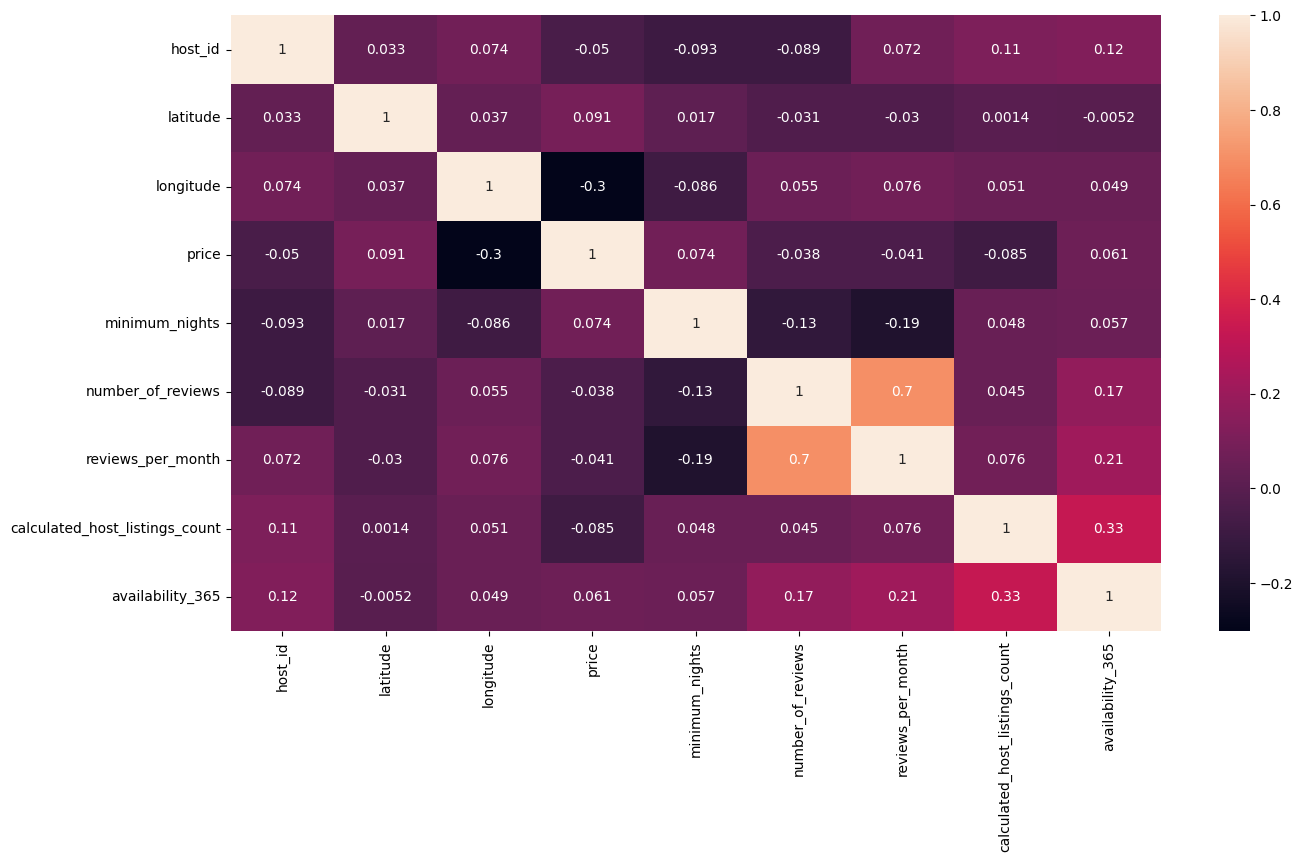

In [22]:
# Select only numeric columns
numeric_airbnb = airbnb.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation
corr = numeric_airbnb.corr(method='kendall')

# Plot the heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(corr, annot=True)

# Display column names for reference if needed
airbnb.columns


In [23]:
airbnb.shape

(48895, 12)

In [24]:
airbnb.head(15)

host_id neighbourhood_group       neighbourhood  latitude  longitude  \
0      2787            Brooklyn          Kensington  40.64749  -73.97237   
1      2845           Manhattan             Midtown  40.75362  -73.98377   
2      4632           Manhattan              Harlem  40.80902  -73.94190   
3      4869            Brooklyn        Clinton Hill  40.68514  -73.95976   
4      7192           Manhattan         East Harlem  40.79851  -73.94399   
5      7322           Manhattan         Murray Hill  40.74767  -73.97500   
6      7356            Brooklyn  Bedford-Stuyvesant  40.68688  -73.95596   
7      8967           Manhattan      Hell's Kitchen  40.76489  -73.98493   
8      7490           Manhattan     Upper West Side  40.80178  -73.96723   
9      7549           Manhattan           Chinatown  40.71344  -73.99037   
10     7702           Manhattan     Upper West Side  40.80316  -73.96545   
11     7989           Manhattan      Hell's Kitchen  40.76076  -73.98867   
12     9744            Brooklyn         South Slope  40.66829  -73.98779   
13    11528           Manhattan     Upper West Side  40.79826  -73.96113   
14    11975           Manhattan        West Village  40.73530  -74.00525   

          room_type  price  minimum_nights  number_of_reviews  \
0      Private room    149               1                  9   
1   Entire home/apt    225               1                 45   
2      Private room    150               3                  0   
3   Entire home/apt     89               1                270   
4   Entire home/apt     80              10                  9   
5   Entire home/apt    200               3                 74   
6      Private room     60              45                 49   
7      Private room     79               2                430   
8      Private room     79               2                118   
9   Entire home/apt    150               1                160   
10  Entire home/apt    135               5                 53   
11     Private room     85               2                188   
12     Private room     89               4                167   
13     Private room     85               2                113   
14  Entire home/apt    120              90                 27   

    reviews_per_month  calculated_host_listings_count  availability_365  
0                0.21                               6               365  
1                0.38                               2               355  
2                0.00                               1               365  
3                4.64                               1               194  
4                0.10                               1                 0  
5                0.59                               1               129  
6                0.40                               1                 0  
7                3.47                               1               220  
8                0.99                               1                 0  
9                1.33                               4               188  
10               0.43                               1                 6  
11               1.50                               1                39  
12               1.34                               3               314  
13               0.91                               1               333  
14               0.22                               1                 0

Data Visualization

In [25]:
import seaborn as sns

In [26]:
airbnb['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

Text(0.5, 1.0, 'Neighbourhood Group')

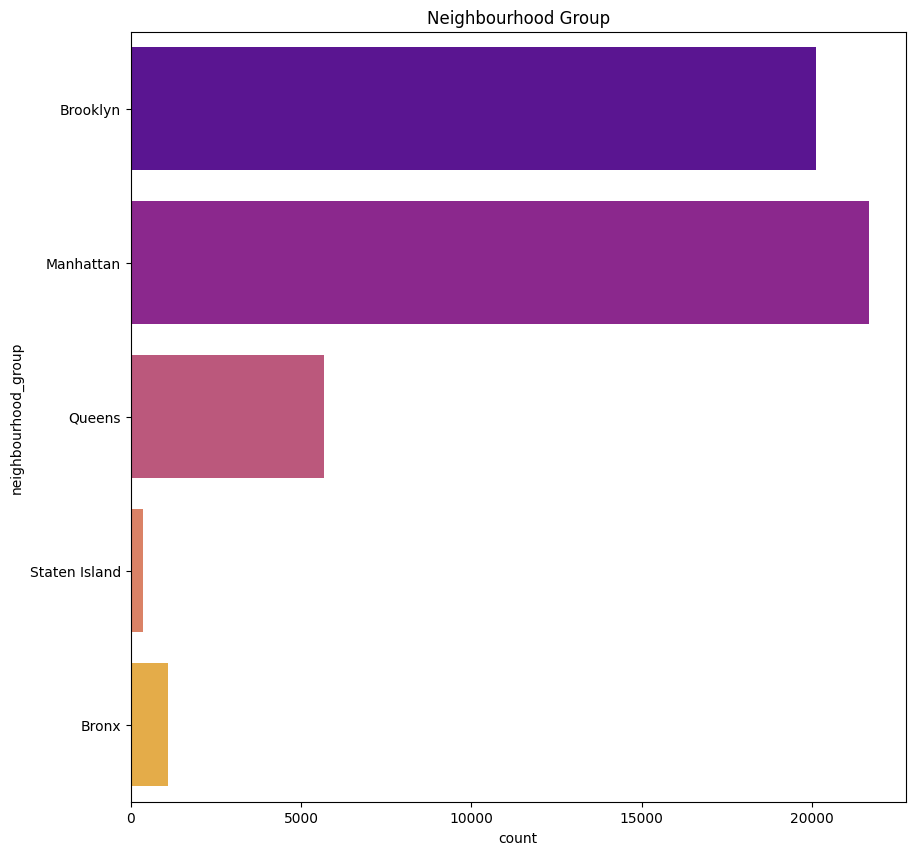

In [27]:
sns.countplot(airbnb['neighbourhood_group'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Neighbourhood Group')

Text(0.5, 1.0, 'Neighbourhood')

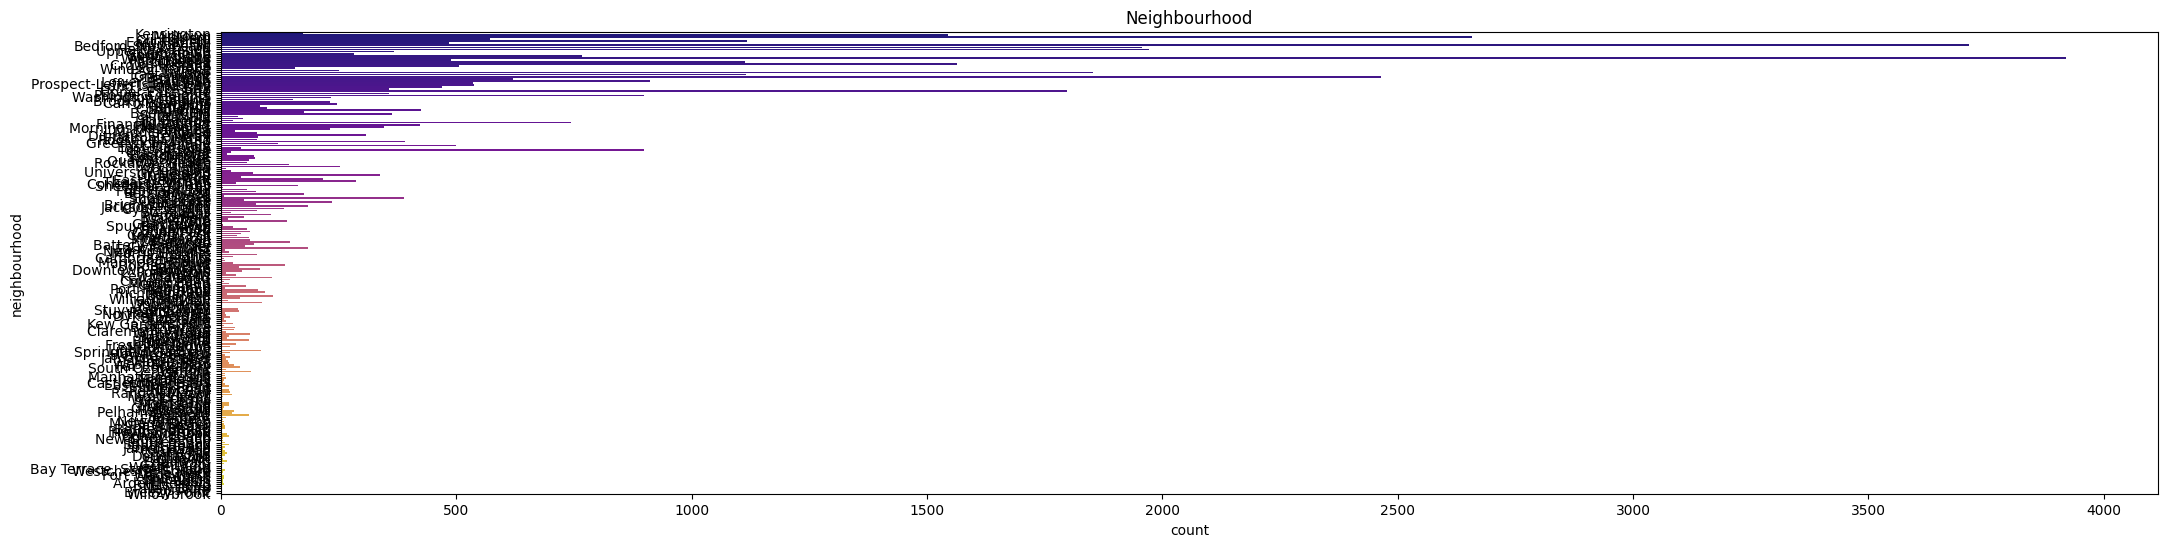

In [28]:
sns.countplot(airbnb['neighbourhood'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(25,6)
plt.title('Neighbourhood')

Text(0.5, 1.0, 'Restaurants delivering online or Not')

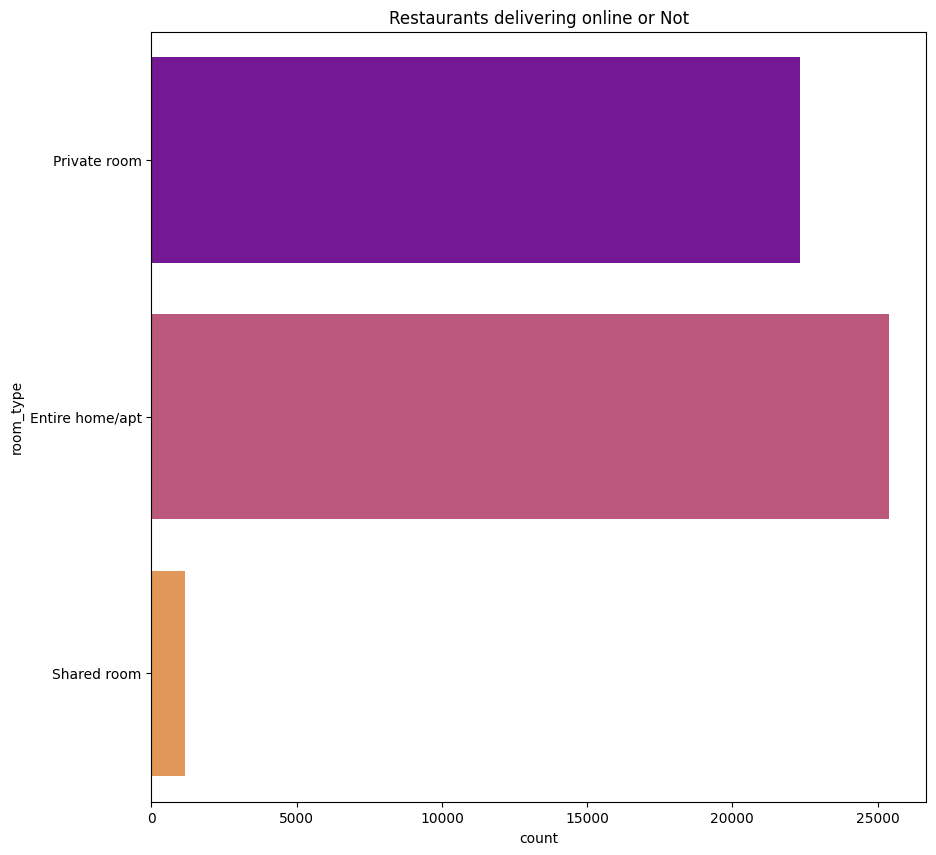

In [29]:
#Restaurants delivering Online or not
sns.countplot(airbnb['room_type'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Restaurants delivering online or Not')

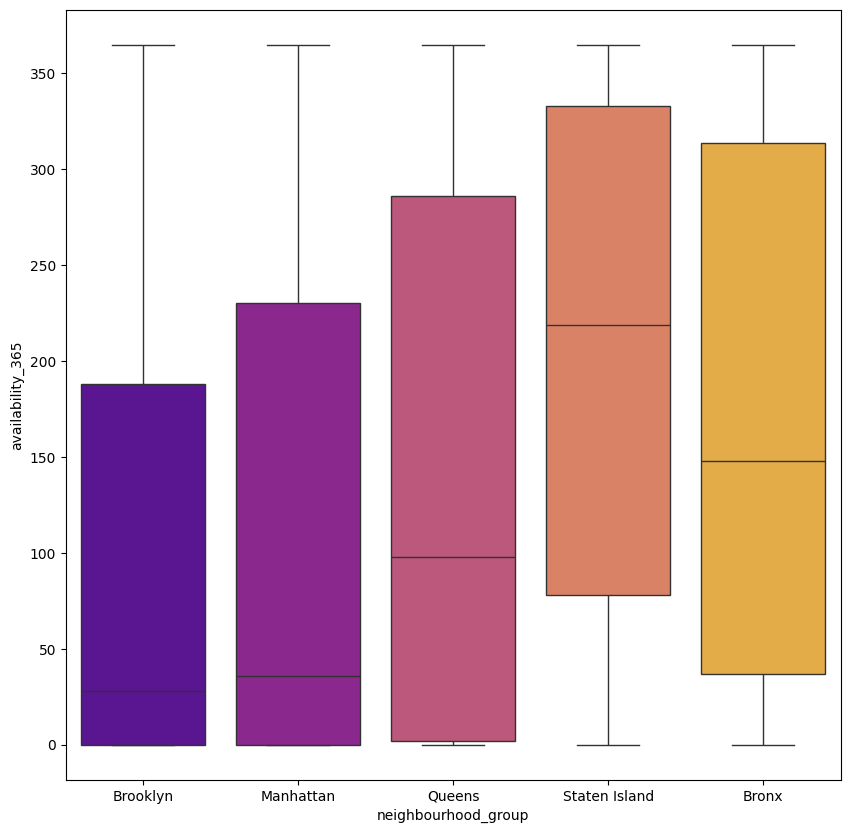

In [30]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=airbnb, x='neighbourhood_group',y='availability_365',palette='plasma')

Map of Neighbourhood group


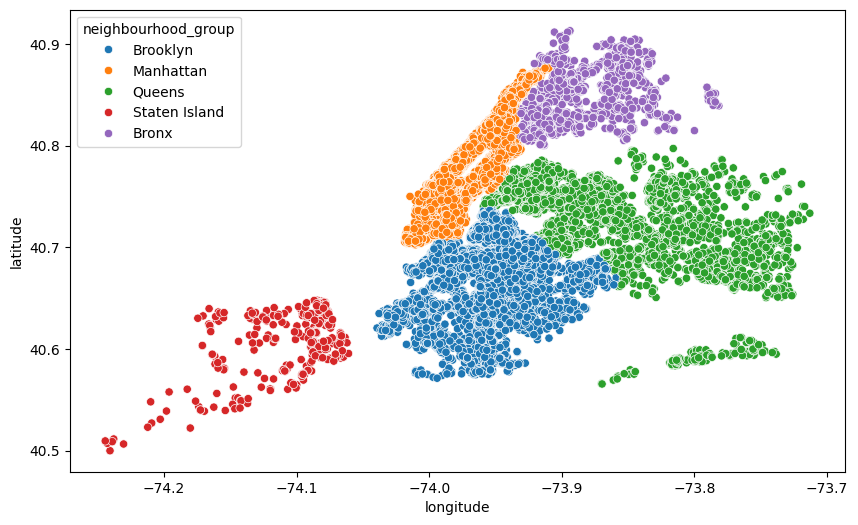

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood_group', data=airbnb)
plt.show()


Map of Neighbourhood

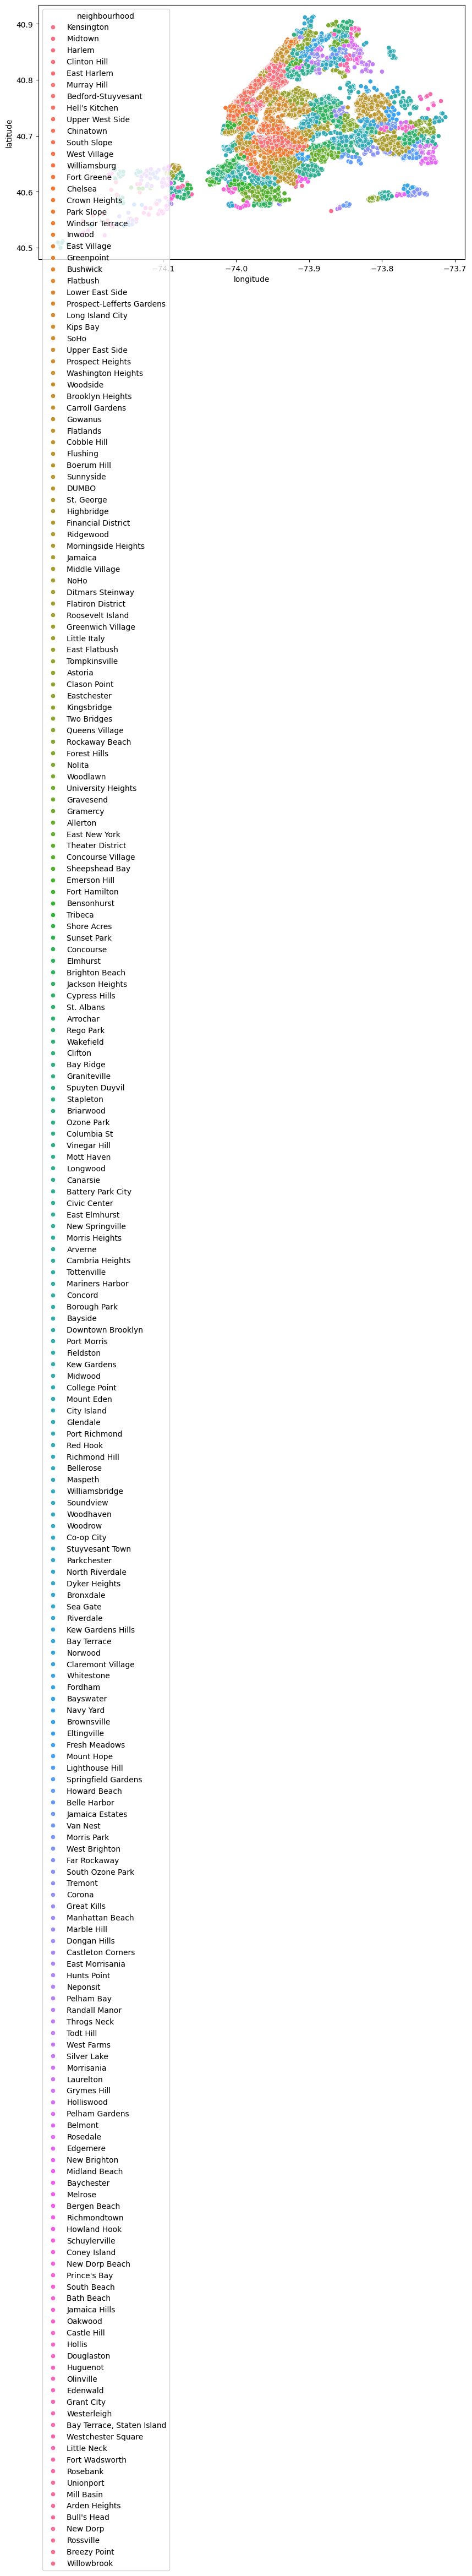

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood', data=airbnb)
plt.show()


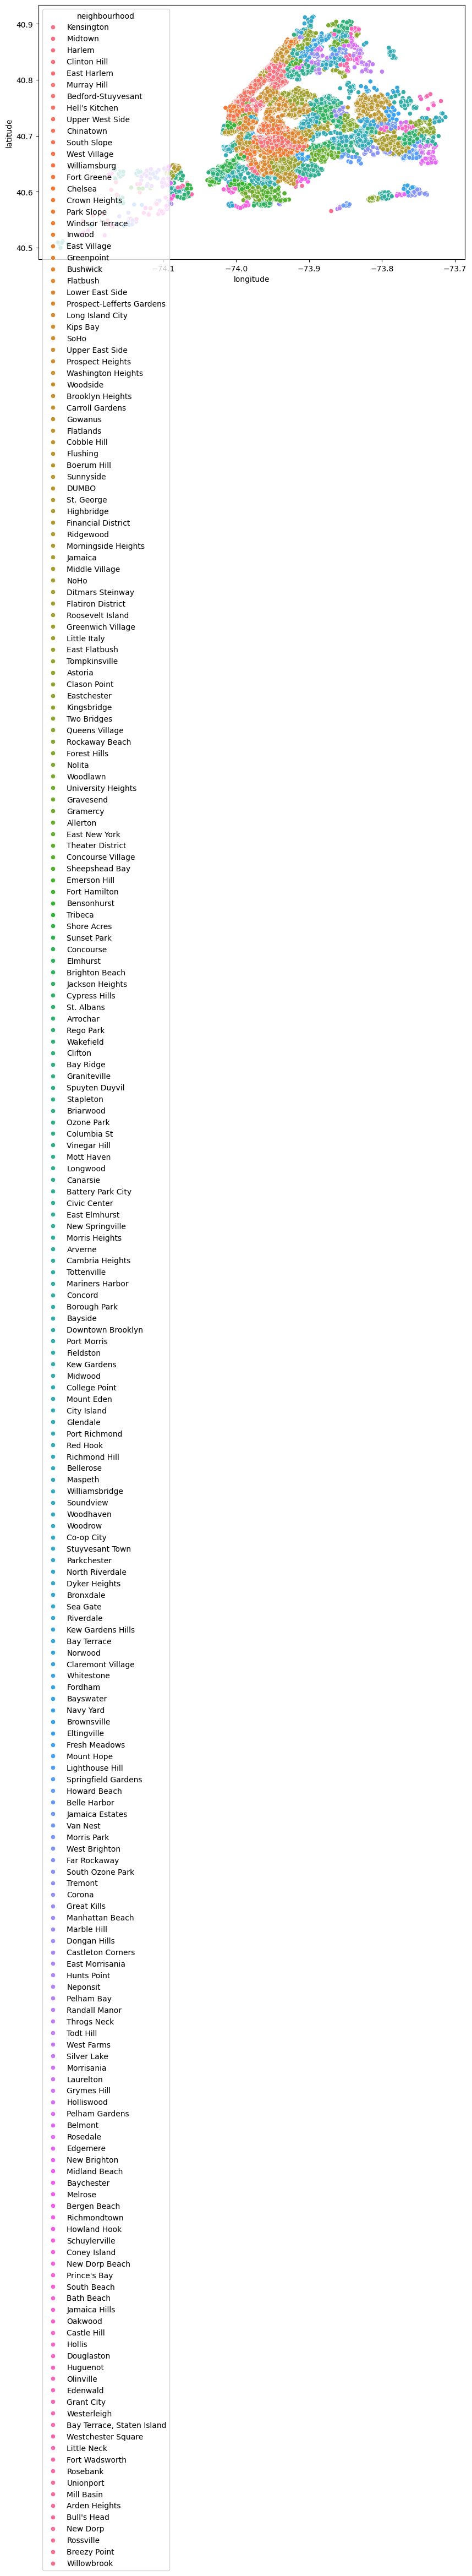

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood', data=airbnb)
plt.show()


Availability of Room

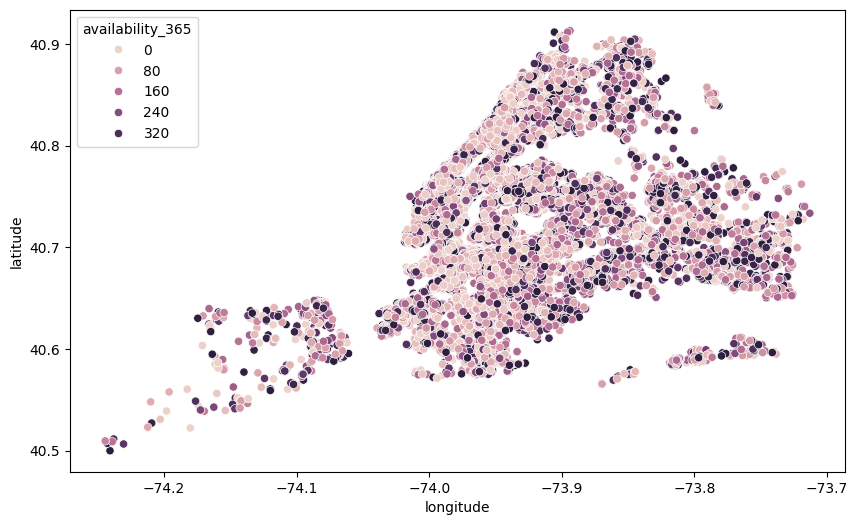

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', hue='availability_365', data=airbnb)
plt.show()

WordCloud

In [35]:
from wordcloud import WordCloud

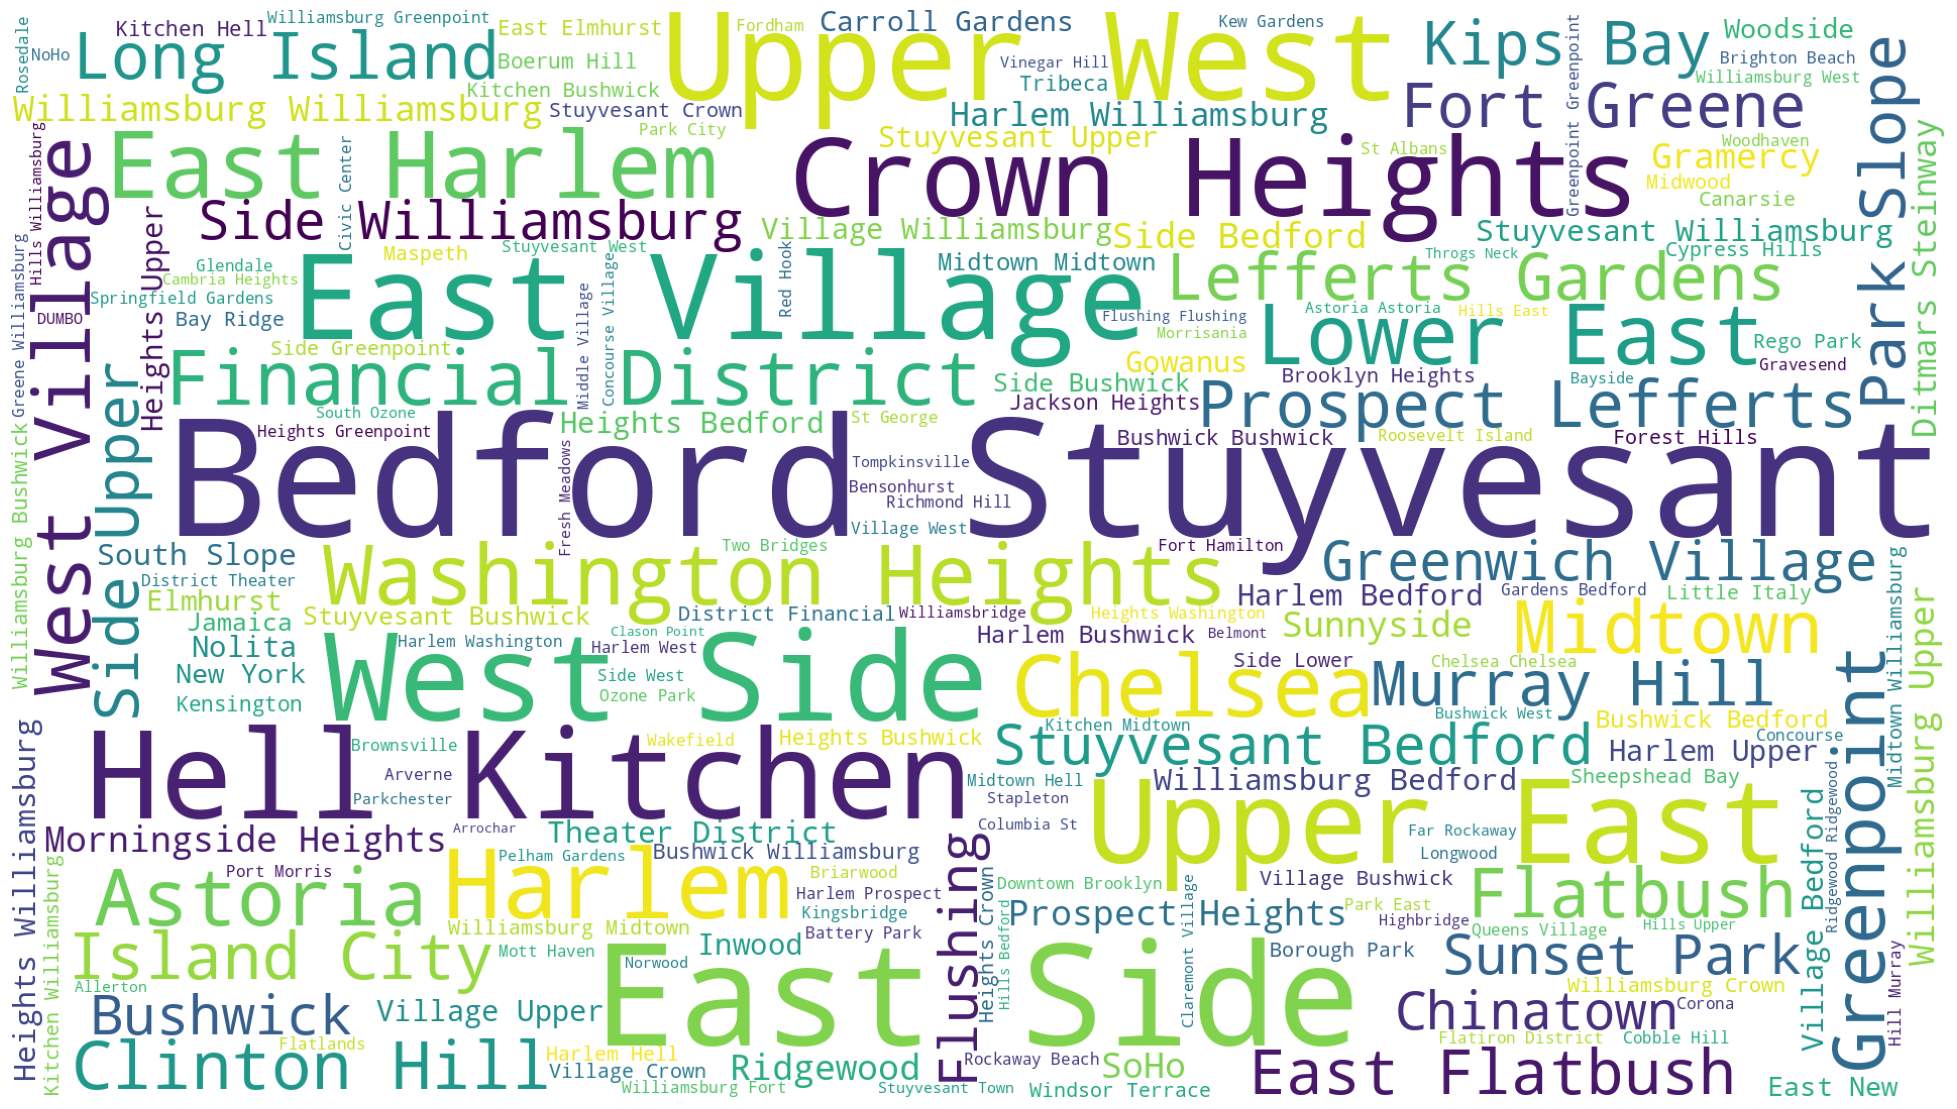

In [36]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(airbnb.neighbourhood))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('neighbourhood.png')
plt.show()

Regression Analysis

In [37]:
airbnb.drop(['host_id','latitude','longitude','neighbourhood','number_of_reviews','reviews_per_month'], axis=1, inplace=True)
#examing the changes
airbnb.head(5)

neighbourhood_group        room_type  price  minimum_nights  \
0            Brooklyn     Private room    149               1   
1           Manhattan  Entire home/apt    225               1   
2           Manhattan     Private room    150               3   
3            Brooklyn  Entire home/apt     89               1   
4           Manhattan  Entire home/apt     80              10   

   calculated_host_listings_count  availability_365  
0                               6               365  
1                               2               355  
2                               1               365  
3                               1               194  
4                               1                 0

In [38]:
#Encode the input Variables
def Encode(airbnb):
    for column in airbnb.columns[airbnb.columns.isin(['neighbourhood_group', 'room_type'])]:
        airbnb[column] = airbnb[column].factorize()[0]
    return airbnb

airbnb_en = Encode(airbnb.copy())

In [39]:
airbnb_en.head(15)

neighbourhood_group  room_type  price  minimum_nights  \
0                     0          0    149               1   
1                     1          1    225               1   
2                     1          0    150               3   
3                     0          1     89               1   
4                     1          1     80              10   
5                     1          1    200               3   
6                     0          0     60              45   
7                     1          0     79               2   
8                     1          0     79               2   
9                     1          1    150               1   
10                    1          1    135               5   
11                    1          0     85               2   
12                    0          0     89               4   
13                    1          0     85               2   
14                    1          1    120              90   

    calculated_host_listings_count  availability_365  
0                                6               365  
1                                2               355  
2                                1               365  
3                                1               194  
4                                1                 0  
5                                1               129  
6                                1                 0  
7                                1               220  
8                                1                 0  
9                                4               188  
10                               1                 6  
11                               1                39  
12                               3               314  
13                               1               333  
14                               1                 0

Index(['neighbourhood_group', 'room_type', 'price', 'minimum_nights',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

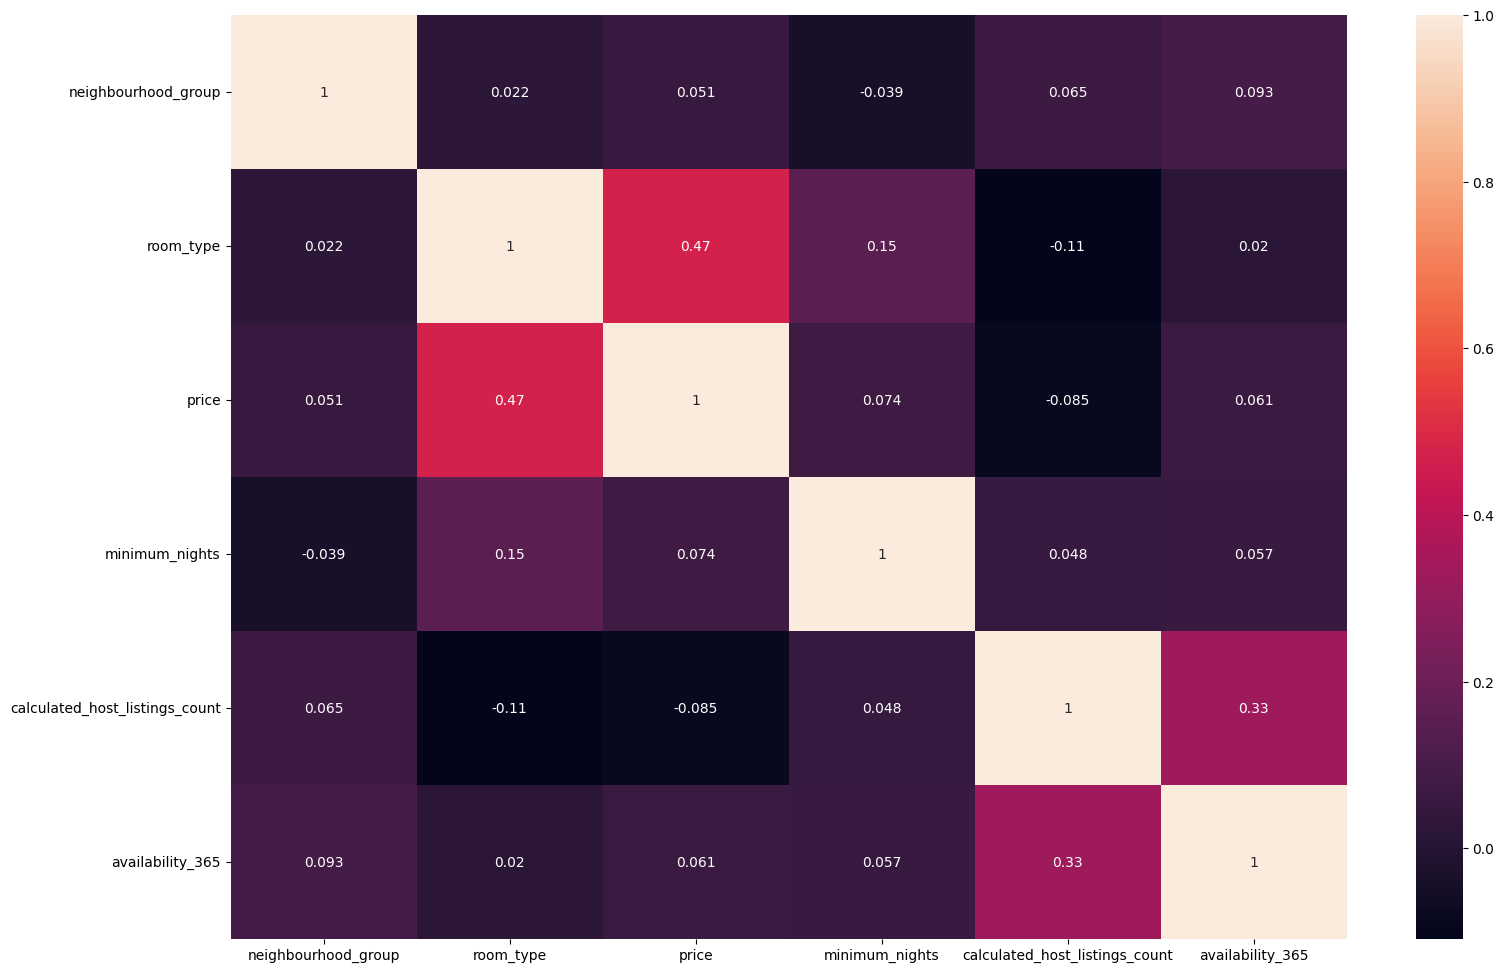

In [40]:
# Select only numeric columns
numeric_airbnb_en = airbnb_en.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation
corr = numeric_airbnb_en.corr(method='kendall')

# Plot the heatmap
plt.figure(figsize=(18, 12))
sns.heatmap(corr, annot=True)

# Display column names for reference if needed
airbnb_en.columns


In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

In [42]:
#Defining the independent variables and dependent variables
x = airbnb_en.iloc[:,[0,1,3,4,5]]
y = airbnb_en['price']
#Getting Test and Training Set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=353)
x_train.head()
y_train.head()

17736    125
24351    101
10069    189
11679    145
16315    120
Name: price, dtype: int64

In [43]:
x_train.shape

(44005, 5)

In [44]:
#Prepare a Linear Regression Model
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)


0.07480306392848757

In [45]:
# Convert categorical features to numerical using LabelEncoder
label_encoders = {}
for column in x_train.columns:
    if x_train[column].dtype == 'object':
        label_encoders[column] = LabelEncoder()
        x_train[column] = label_encoders[column].fit_transform(x_train[column])
        x_test[column] = label_encoders[column].transform(x_test[column])

# Prepare a Linear Regression Model
reg = LinearRegression()
reg.fit(x_train, y_train)

# Predict values using the test set
y_pred = reg.predict(x_test)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2}")

R-squared score: 0.07480306392848757
